# LAB 02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN

## A. Thu thập dữ liệu

**Ngữ cảnh**
- Coca-Cola là một thương hiệu toàn cầu nổi tiếng với lịch sử lâu đời và giá cổ phiếu ổn định. Vì vậy, đây là một đối tượng nghiên cứu hấp dẫn để tìm hiểu về các yếu tố ảnh hưởng đến giá cổ phiếu của công ty và cách thức thị trường chứng khoán hoạt động.
- Dữ liệu giá cổ phiếu của Coca-Cola có sẵn rộng rãi, cho phép nhóm dễ dàng thu thập và phân tích dữ liệu.
**Nguồn dữ liệu**
- Bộ dữ liệu này chứa thông tin về giá cổ phiếu của Coca-Cola (KO) được giao dịch trên sàn giao dịch chứng khoán New York (NYSE) với đơn vị tiền tệ là USD. Dữ liệu được thu thập từ 19/01/1962 đến 19/12/2021 và được lấy từ [Kaggle](https://www.kaggle.com/datasets/meetnagadia/coco-cola-stock-data-19622021)
- Tác giả: Meet Nagadia.
- Giấy phép: [Database Contents License (DbCL) v1.0](https://opendatacommons.org/licenses/dbcl/1-0/).
- Nguồn thu thập: [Yahoo Finance](https://finance.yahoo.com/quote/KO/history?p=KO).
- Cách thức thu thập: Tác giả không đề cập, có thể là tải về trực tiếp từ Yahoo Finance, API, v.v...

## B. Khám phá dữ liệu

### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa
import mplfinance as mpf

### Đọc dữ liệu

In [2]:
df = pd.read_csv('../datasets/COCO COLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 825.7+ KB


### Khám phá dữ liệu

#### Kích thước của dữ liệu

In [4]:
df.shape

(15096, 7)

#### Ý nghĩa của mỗi dòng và cột

**Đối với dòng**
- Mỗi dòng chứa thông tin về phiên giao dịch của ngày đó. Nếu các dòng có ý nghĩa khác nhau sẽ làm cho tính tin cậy của tập dữ liệu bị giảm đi và có thể dẫn đến một vài sự nhầm lẫn và tính nhất quán giữa chúng.
**Đối với cột**
- `Date`: Ngày ghi nhận giao dịch diễn ra.
- `Open`: Mức giá giao dịch đầu tiên của cổ phiếu khi bắt đầu phiên giao dịch.
- `High`: Mức giá cao nhất của cổ phiếu được giao dịch trong ngày.
- `Low`: Mức giá thấp nhất của cổ phiếu được giao dịch trong ngày.
- `Close`: Được hiểu là giá giao dịch cuối cùng của cổ phiếu trong một phiên giao dịch.
- `Adj Close`: Giá đóng cửa điều chỉnh (Adjusted closing price) là giá đóng cửa của cổ phiếu được điều chỉnh để phản ánh giá trị thực tế của cổ phiếu sau khi tính đến các yếu tố tác động của doanh nghiệp.
- `Volume`: Khối lượng giao dịch đo lường số lượng cổ phiếu được mua bán đối với cổ phiếu, hoặc số hợp đồng được giao dịch đối với các sản phẩm khác.

#### Kiểu dữ liệu của mỗi cột

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Cột `Date` hiện đang là object, chúng ta cần chuyển đổi về dạng thời gian. Sau đó chuyển tên cột thành các ký tự thường.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

#### Sự trùng lặp

In [7]:
df.duplicated().sum()

0

Dữ liệu hiện tại không có dòng nào bị trùng lặp.

#### Phân phối của dữ liệu số

In [8]:
num_cols = df.columns[1:]

In [9]:
df[num_cols].isnull().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

Ở đây ta có thể thấy không có cột nào chứa missing data.

Phân bố của dữ liệu

In [10]:
def lower_quartile(df):
    return df.quantile(0.25)

def upper_quartile(df):
    return df.quantile(0.75)

df[num_cols].agg(['min', lower_quartile, 'median', upper_quartile, 'max', 'mean'])

,open,high,low,close,adj_close,volume
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
lower_quartile,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
median,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
upper_quartile,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06


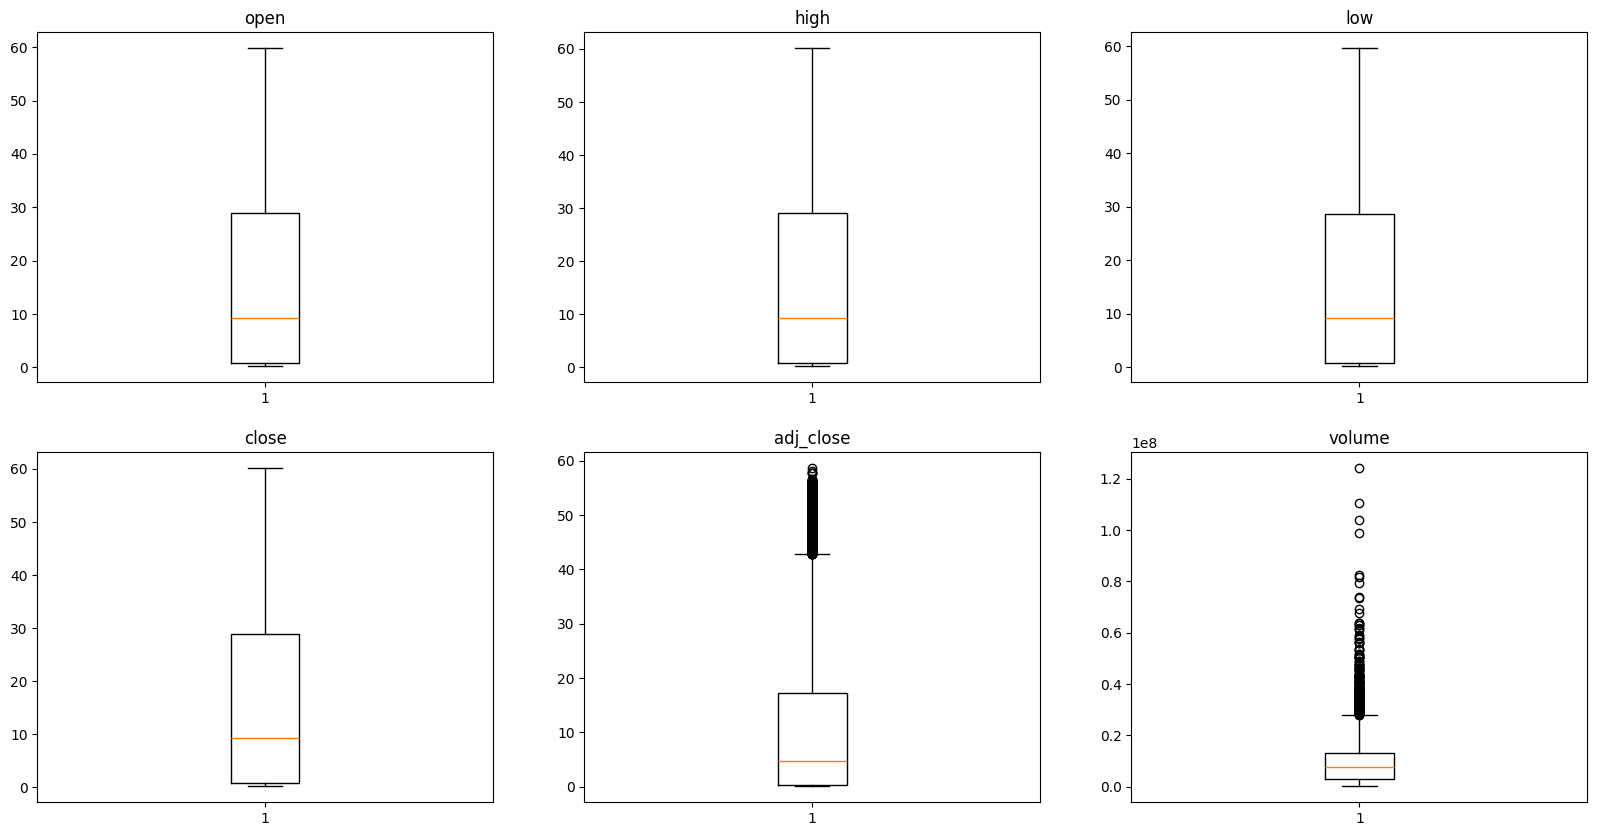

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(num_cols):
    ax_ = ax.flat[i]
    ax_.boxplot(df[col])
    ax_.set_title(col)

Dữ liệu ban đầu đã tương đối sạch. Vì vậy, việc xử lý dữ liệu phụ thuộc vào câu hỏi đặt ra ở các phần sau.

## C. Khám phá mối quan hệ trong dữ liệu

In [12]:
df.tail()

,date,open,high,low,close,adj_close,volume
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900
15095,2021-12-17,58.490002,58.919998,57.700001,57.730000,57.730000,51874400


Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


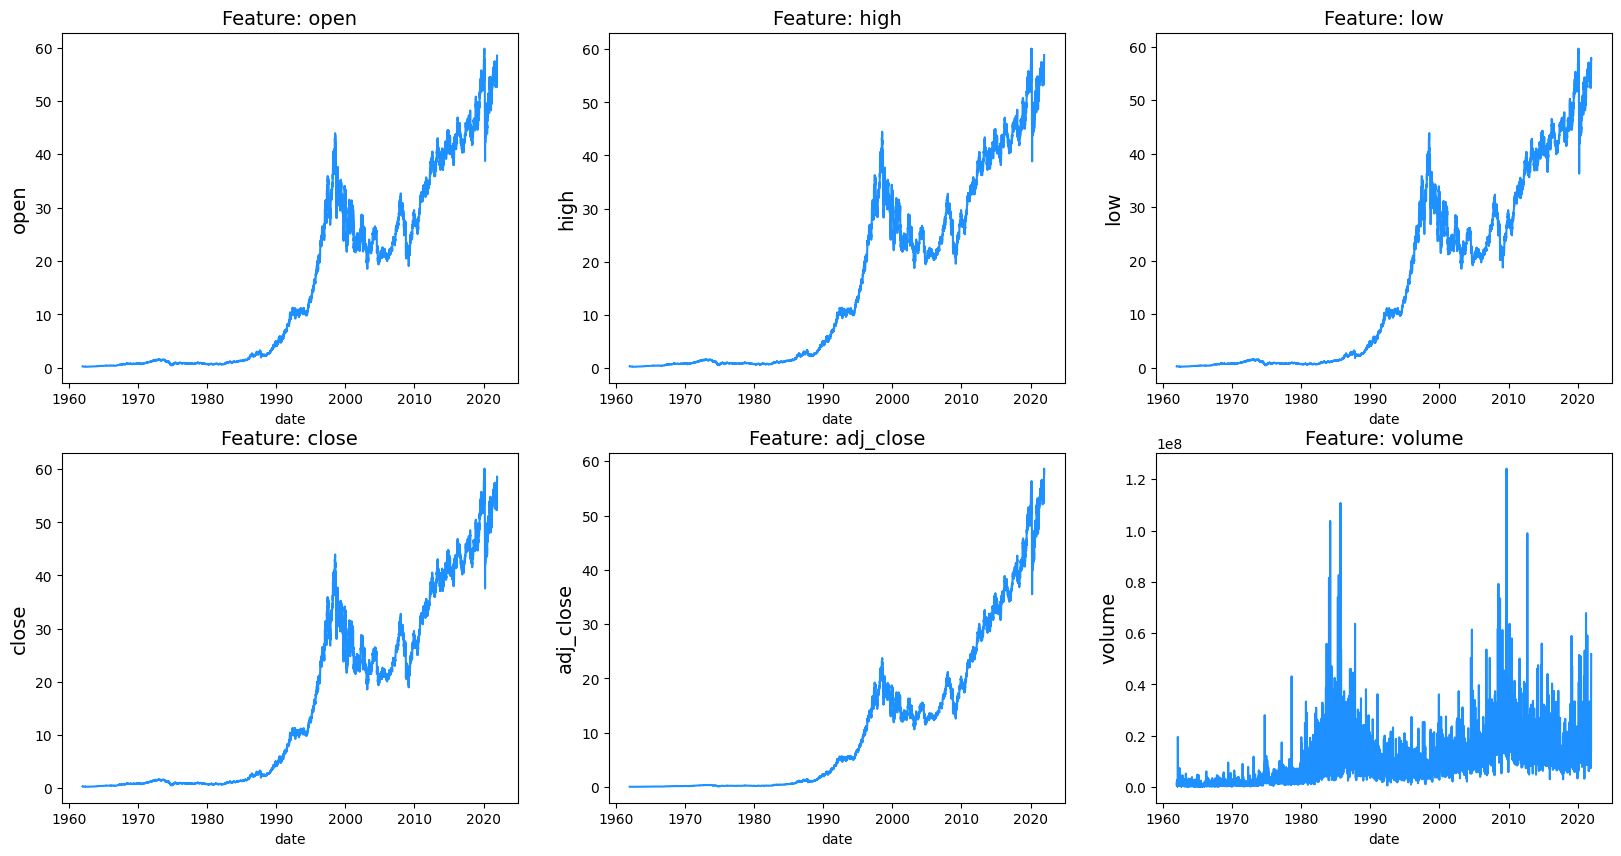

In [13]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()
features = df.columns[1:]
print(features)
for i in range(0, len(features)):
    sns.lineplot(x=df['date'], y=df[features[i]], ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: '+ features[i], fontsize=14)
    ax[i].set_ylabel(ylabel=features[i], fontsize=14)

### Câu hỏi 1: Dữ liệu time series có bị white noise (một chuỗi các biến ngẫu nhiên không có mối quan hệ được phân phối đồng nhất) hay không? 

#### Mục đích: ta sẽ xem xét dữ liệu có rơi vào trường hợp cần phải áp dụng mô hình white noise, chứ không thể áp dụng các mô hình hồi quy khác như ARIMA, SARIMA, ... để dự đoán giá trị ở cột target.

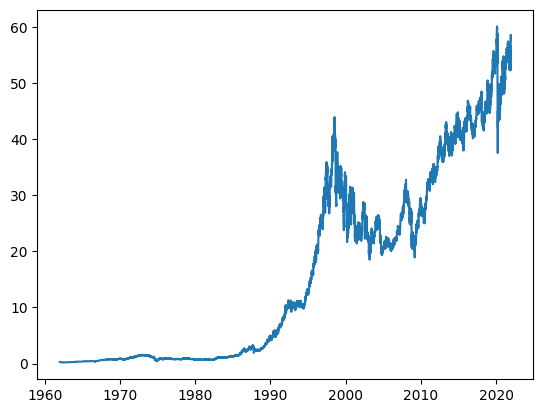

In [14]:
# WHITE NOISE dectection using ACF plot
tmp_df = df[['date', 'close']]
tmp_df = tmp_df.set_index('date')
tmp_df = tmp_df.sort_index()
tmp_df.head(10)

plt.plot(tmp_df)
plt.show()

#### Nhận xét:
- Nhìn chung theo năm, ta có thể thấy xu hướng giá trị cổ phiếu sau khi sàn đóng của Coca Cola tăng mạng trong khoảng từ năm 1960 đến năm 2000, sau đó có sự giảm dần đến khoảng năm 2005 và giá trị có xu hướng tăng mặc dù sự biến động lên xuống khá nhiều trong khoảng năm từ 2010 đến 2020.

- Tính phù hợp của biểu đồ: sử dụng biểu đồ đường ta có thể nhận thấy xu hướng của giá trị cổ phiếu sau khi sàn đóng qua các thời điểm mong muốn, từ đó đánh giá sự tăng giảm để áp dụng các chính sách phát triển cần thiết.
#### Nguyên tắc sử dụng trong biểu đồ:
- Tính bao quát (Closure): biểu đồ được đặt trong một khung hình để thu hút sự chú ý của người xem.
- Tính gần gũi (Proximity): các điểm dữ liệu gần nhau (theo ngày, tháng) được nhóm lại với nhau, giúp ta có cái nhìn tổng quát về xu hướng của giá trị trong khoảng thời gian tính theo năm.

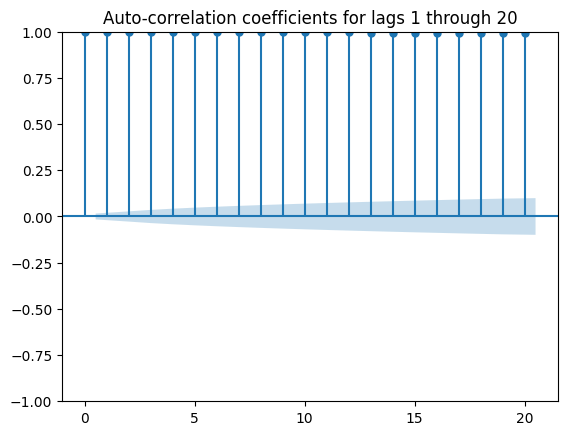

In [15]:
tsa.plot_acf(tmp_df, lags=20, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 20')
plt.show()

In [16]:
# test again by using  Ljung-Box test
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(tmp_df, lags=[20], boxpierce=True, model_df=0, period=None, return_df=None)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
20,299864.260363,0.0,299616.410636,0.0


#### Nhận xét:
- Biểu đồ trên thể hiện mối tương quan của dữ liệu với dữ liệu của lần lượt 20 ngày trước đó
- Tất cả đều là mối tương quan mạnh khi gía trị correlation bằng 1, nhưng ta chưa thật sự nhìn thấy được tính mùa vụ ở đây.
- Có lẽ ta phải nhóm dữ liệu theo từng tháng và tiến hành phân tích.
- Không có lag nào mang giá trị correlation trong khoảng 0 đến 0.05 trong vùng confident interval được thiết lập.

#### Kết luận:
- Từ biểu đồ autocorrelation, nếu như dữ liệu time series là white noise thì ngoại trừ lag 0 có giá trị autocorrelation luôn bằng 1 thì tất cả các lag còn lại sẽ bằng 0. Nhưng ở đây ta không nhận thấy điều đó.
- Bên cạnh đó, dựa trên thống kê sử dụng Ljung-Box test, ta thấy p-value của cả Ljung-Box và Box-Pierce đều bằng 0, nhỏ hơn 0.05 nên ta có thể phủ định giả thuyết là dữ liệu trên là ngẫu nhiên thuần túy.
- Tiếp đến ta sẽ kiểm tra dữ liệu trên có phải là **Random Walk** hay không?

#### Kĩ thuật sử dụng trong biểu đồ autocorrelation:
- Tính bao quát: biểu đồ được đặt trong khung hình để thu hút sự chú ý của người xem

### Câu hỏi 2: Dữ liệu trên có phải là Random Walk (sự khác biệt đầu tiên trong dữ liệu sẽ là white noise thuần) hay không?


In [17]:
# RANDOM WALK dectection

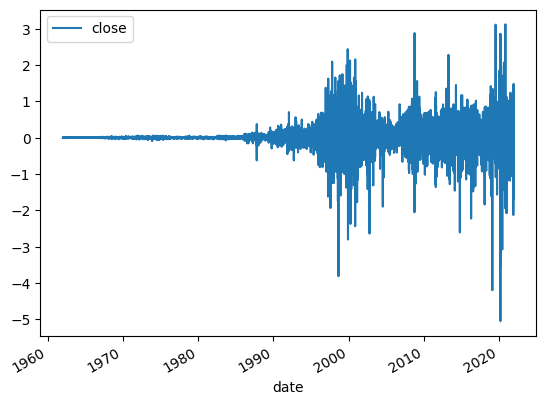

In [18]:
diff_tmp = tmp_df.diff()
diff_tmp.dropna(inplace = True)

diff_tmp.plot()

plt.show()

In [19]:
diag.acorr_ljungbox(diff_tmp, lags=[20], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
20,115.902572,1.627889e-15,115.81082,1.692440e-15


#### Kết luận:
- Dựa trên p-value, ta thấy cả 2 giá trị đều nhỏ hơn 0.05 nên ta có thể bác bỏ giả thuyết rằng dữ liệu trên là Random Walk, và ta không cần phải áp dụng mô hình White noise để dự đoán.
- Tiếp đến ta sẽ tiến hành phân rã các yếu tố xu hướng, mùa vụ, chu kỳ, nhiễu (time series decomposition) để phân tích dữ liệu chuỗi thời gian này. 

### Câu 3: Xu hướng, mùa vụ và mức độ nhiễu trong dữ liệu được thể hiện như thế nào?
**Mục đích:** Nhằm để tìm hiểu các yếu tố xu hướng, mùa vụ của giá cổ phiếu theo thời gian và những tác động nhiễu ảnh hưởng đến dữ liệu

<Figure size 2000x1000 with 0 Axes>

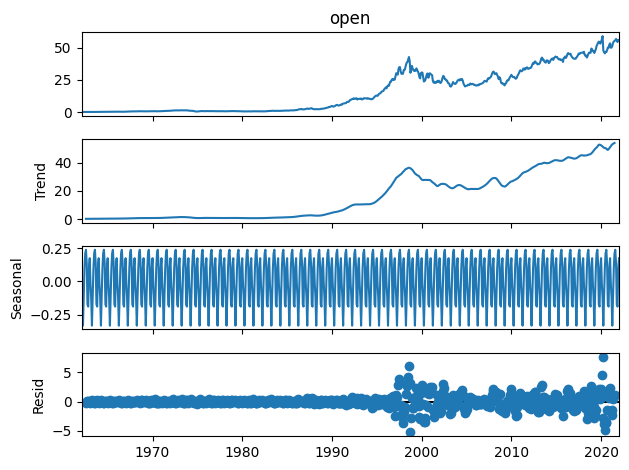

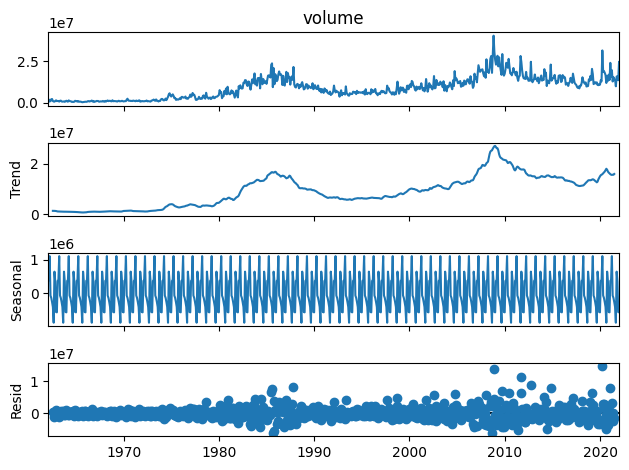

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
copied_df = df.copy()
plt.figure(figsize=(20, 10))
# lấy những feature dùng để decompose
core_columns =  [
    'open', 'volume'
]
copied_df.set_index('date', inplace=True)
# resample dữ liệu theo tháng để dễ dàng phân tích xu hướng và mùa vụ
copied_df = copied_df.resample('M').mean()
for i, column in enumerate(core_columns):
    res = seasonal_decompose(copied_df[column], model='additive')
    res.plot()
plt.show()

Từ biểu đồ, chúng ta có thể nhận xét những điều sau về giá trị cổ phiếu:

**1. Xu hướng tăng:** BIểu đồ cho thấy giá cổ phiếu đã tăng trong một khoảng thời gian dài, từ năm 1970 đến năm 2020.
Xu hướng tăng này có thể được giải thích bởi một số yếu tố, chẳng hạn như:
- Tăng trưởng doanh nghiệp: Công ty có thể đã trải qua giai đoạn tăng trưởng mạnh mẽ trong thời gian này, dẫn đến việc tăng giá trị cổ phiếu.
- Tăng lợi nhuận: Lợi nhuận của công ty có thể đã tăng trong thời gian này, khiến các nhà đầu tư tin tưởng vào tiềm năng tương lai của công ty và sẵn sàng trả giá cao hơn cho cổ phiếu.
- Cải thiện điều kiện kinh tế: Điều kiện kinh tế có thể đã được cải thiện trong thời gian này, dẫn đến việc tăng niềm tin của nhà đầu tư và nhu cầu đối với cổ phiếu.
**2. Biến động:** Mặc dù giá cổ phiếu có xu hướng tăng chung, nhưng cũng có thể thấy rằng giá cổ phiếu có biến động mạnh trong thời gian này.
Biến động này có thể được giải thích bởi một số yếu tố, chẳng hạn như:
- Biến động thị trường: Thị trường chứng khoán có thể đã trải qua một số giai đoạn biến động trong thời gian này, dẫn đến việc giá cổ phiếu tăng giảm theo.
- Sự kiện kinh tế: Một số sự kiện kinh tế, chẳng hạn như khủng hoảng tài chính, có thể đã tác động tiêu cực đến giá cổ phiếu.
- Tin tức về công ty: Một số tin tức về công ty, chẳng hạn như thông báo về lợi nhuận hoặc sự kiện pháp lý, có thể đã tác động đến giá cổ phiếu.
**3. Khối lượng giao dịch:**
Biểu đồ cũng cho thấy khối lượng giao dịch cổ phiếu đã tăng trong thời gian này. Khối lượng giao dịch cao hơn cho thấy rằng nhiều nhà đầu tư quan tâm đến cổ phiếu của công ty và sẵn sàng mua bán nó.
Khối lượng giao dịch cao hơn cũng có thể là dấu hiệu cho thấy giá cổ phiếu có thể tiếp tục tăng trong tương lai.
> Nhìn chung, biểu đồ cho thấy giá trị cổ phiếu đã tăng trong một khoảng thời gian dài, nhưng cũng có biến động mạnh. Biến động này có thể được giải thích bởi một số yếu tố, chẳng hạn như biến động thị trường, sự kiện kinh tế và tin tức về công ty. Khối lượng giao dịch cổ phiếu cũng đã tăng trong thời gian này, cho thấy rằng nhiều nhà đầu tư quan tâm đến cổ phiếu của công ty và sẵn sàng mua bán nó.

### Câu hỏi 4: Phân tích giá cổ phiếu vào 120 ngày cuối cùng

**Mục đích:** có cái nhìn tổng quan về cổ phiếu những ngày gần nhất, phân tích các điểm bất thường một cách rõ ràng hơn dựa vào việc chọn khoảng thời gian ngắn.

Xây dựng biểu đồ Candlestick thể hiện biến động giá cổ phiếu dựa vào 4 yếu tố `open`, `close`, `high` và `low`. Các thành phần của một Candlestick được thể hiện bên dưới.

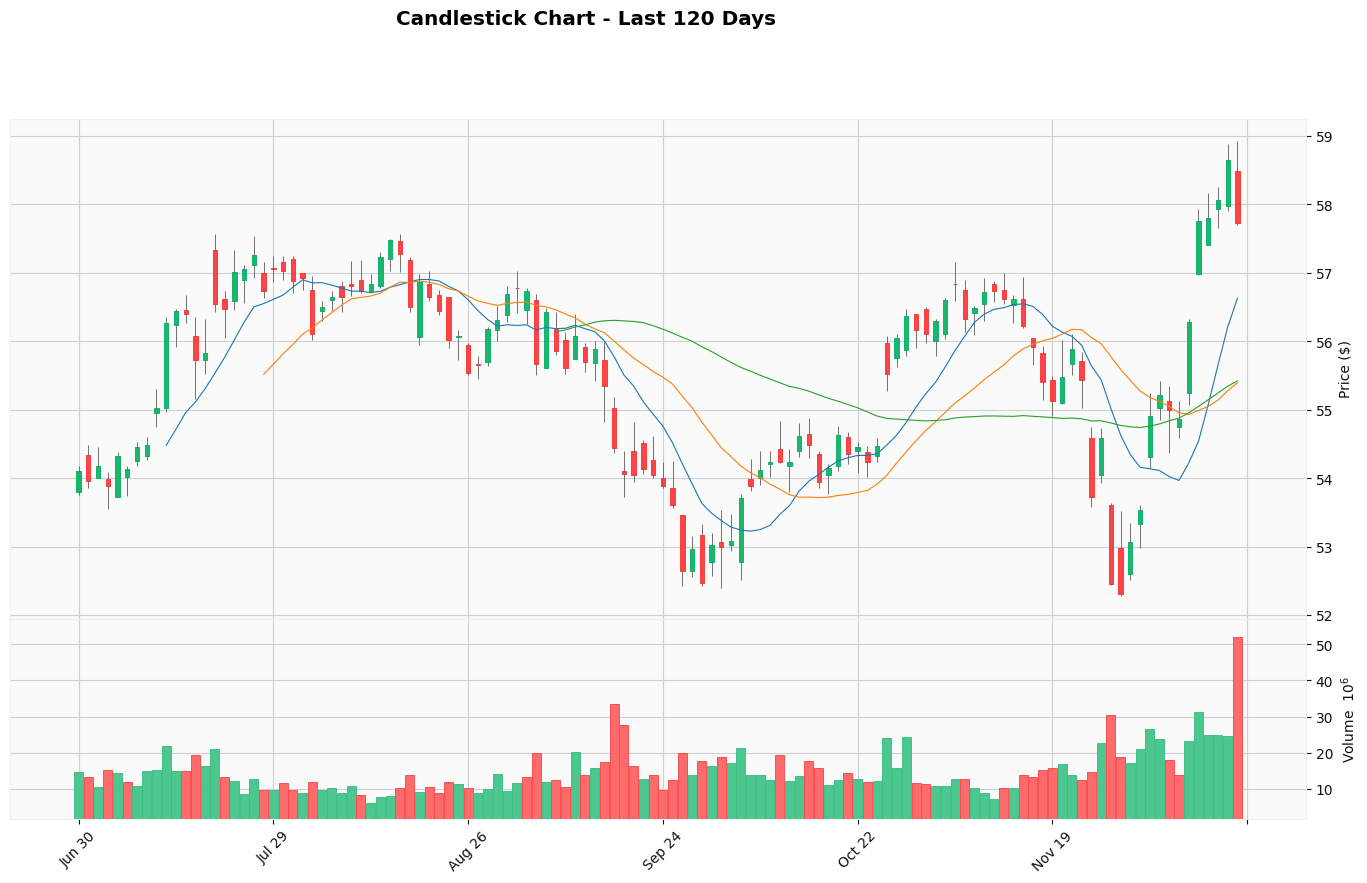

In [21]:
# df_subset = df[(df['date']>'1999-01-01') & (df['date']<'2000-01-01')].set_index('date')
df_subset = df[-120:].set_index('date')

# Customize market colors to modify volume color
s = mpf.make_mpf_style(base_mpf_style='yahoo')

# Plotting the candlestick chart with the custom style
mpf.plot(df_subset, type='candle', style=s, 
         title='Candlestick Chart - Last 120 Days',
         ylabel='Price ($)', 
         mav=(10,20,50), 
         volume=True, 
         figsize=(18,10))

**1. Các thành phần của Candlestick chart:**
Biểu đồ candlestick hàng ngày hiển thị giá open, high, low, và close của thị trường trong một ngày cụ thể:
- Phần rộng của nến được gọi là “thân nến”, đại diện cho khoảng giá giữa giá mở cửa và giá đóng cửa.
- Khi thân nến đỏ, điều đó có nghĩa là giá đóng thấp hơn giá mở. Nếu nó có màu xanh lục, giá đóng cửa cao hơn giá mở cửa.
- Bóng kéo dài phía trên và phía dưới thân nến, thể hiện mức giá cao nhất và thấp nhất trong ngày.

**2. Nhận xét:**
- Khối lượng cổ phiếu giao dịch được thể hiện bằng các thanh ở cuối biểu đồ. Những khoảng thời gian có khối lượng tăng đột biến bất thường có thể biểu thị sự quan tâm đáng kể đến việc mua hoặc bán. Những ngày có khối lượng giao dịch cao (giữa tháng 9, giữa tháng 12) thường chỉ ra các mức giá support hoặc resistance quan trọng.
- Khoảng trống giá (khoảng trống giữa các cây nến), những điều này có thể cho thấy áp lực mua hoặc bán mạnh và thường thấy trong thời gian có nhiều hoạt động tin tức hoặc do sự thay đổi giá qua đêm tại các thị trường đóng cửa hàng ngày.
- Sự giao nhau giữa các đường trung bình động ngắn hạn và dài hạn có thể báo hiệu sự thay đổi xu hướng.
- Xu hướng tăng và giảm (Bullish và Bearish trend): Chuỗi các nến xanh thể hiện giá cổ phiếu có xu hướng tăng, một hành động tích cực.

Một chi tiết bất thường nổi bật trong biểu đồ là vào khoảng tháng 11, nơi có sự tăng giá mạnh kèm theo khối lượng lớn. Điều này cho thấy áp lực mua mạnh và có thể là dấu hiệu của những tin tức hoặc sự kiện tích cực liên quan đến Coca-Cola trong thời gian đó. Cần nghiên cứu những gì đã xảy ra trong khoảng thời gian này để hiểu bối cảnh của biến động giá này.

**Encoding:**
- `open`,`close`,`high`,`low`:
    - Kiểu dữ liệu: Định lượng (quantiative) - thể hiện giá trị cổ phiếu
    - Encoding: Hình dạng (shape) - là một phần của candle, phân biệt các loại candle
- `Các đường trung bình động`:
    - Kiểu dữ liệu: Định lượng (quantiative) - thể hiện giá trị trung bình động của cổ phiếu 10 ngày, 20 ngày và 50 ngày
    - Encoding: Định hướng (orientation) - thể hiện xu hướng 

**Kỹ thuật được sử dụng trong biểu đồ:**
- *Nguyên tắc tương đồng (Similarity)*: Nhóm các nến chung màu biểu thị cùng nhóm có cùng đặc điểm.
- *Sử dụng màu sắc*: Màu sắc được sử dụng để phân biệt các đường đi cổ phiếu ở các đường trung bình động, sử dụng 2 màu tương phản xanh-đỏ để chỉ 2 trạng thái đối lập của giá đóng và mở của một ngày (giá đóng cao hơn hoặc giá mở cao hơn).

#### Sự kiện gì đã xảy ra vào tháng 11 năm 2021 khiến giá cổ phiếu của Coca-Cola tăng mạnh?

Để trả lời câu hỏi này, chúng ta cần tìm hiểu về các sự kiện quan trọng liên quan đến Coca-Cola vào thời điểm đó. Dựa trên kết quả tìm kiếm, có một số sự kiện đáng chú ý:
- Coca-Cola đã báo cáo kết quả kinh doanh quý 3 năm 2021 mạnh mẽ và tăng dự báo cho cả năm.
- Coca-Cola đã mua lại toàn bộ cổ phần còn lại trong BODYARMOR.
Đây có thể là những yếu tố chính góp phần vào sự tăng giá mạnh của cổ phiếu Coca-Cola. 

Sử dụng `adj_close` để phản ánh một cách chính xác hơn giá trị thực của cổ phiếu. Giá đóng cửa điều chỉnh được tính toán để phản ánh các yếu tố như cổ tức, quyền chọn mua cổ phiếu, và các sự kiện tương tự khác. Những sự kiện này có thể làm thay đổi giá cổ phiếu và tạo ra sự sai lệch khi so sánh giá trị của cổ phiếu qua thời gian. Do đó, việc sử dụng giá đóng cửa điều chỉnh giúp loại bỏ những sai lệch này và cung cấp một cái nhìn thực tế hơn về hiệu suất của cổ phiếu.

Tuy nhiên ta thêm đường line của `close` price để so sánh và nhận xét.

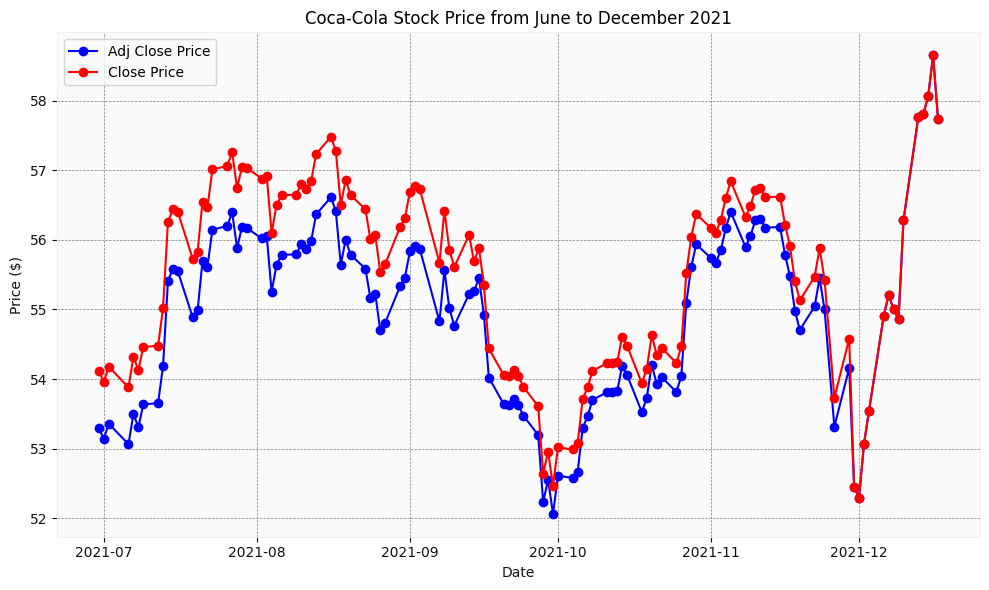

In [22]:
# Customize plot style
plt.figure(figsize=(10, 6))

# Plot Adj Close Price
plt.plot(df_subset.index, df_subset['adj_close'], label='Adj Close Price', color='b', linestyle='-', marker='o')

# Add Close Price
plt.plot(df_subset.index, df_subset['close'], label='Close Price', color='r', linestyle='-', marker='o')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Coca-Cola Stock Price from June to December 2021')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add a dashed grid
plt.tight_layout()  # Adjust spacing
plt.show()


**Nhận xét:**
- Giá cổ phiếu của Coca-Cola từ tháng 6 đến tháng 12 năm 2021 đã trải qua một số biến động. Cả hai đường "Close Price" (Giá đóng cửa) và "Adj Close Price" (Giá đóng cửa điều chỉnh) đều theo một khuynh hướng tương tự, có vẻ như di chuyển song song và gần như trùng nhau. Điều này cho thấy rằng trong khoảng thời gian này, không có sự thay đổi đáng kể nào trong các yếu tố có thể ảnh hưởng đến giá đóng cửa điều chỉnh, như cổ tức hoặc chia cổ phiếu.

- Giá cổ phiếu dao động từ khoảng 52 đến 58 đô la Mỹ. Điều này có thể cho thấy rằng cổ phiếu của Coca-Cola đã trải qua một số biến động nhưng vẫn duy trì trong một khoảng giá nhất định.

**Encoding:**
- `close`,`adj_close`:
    - Kiểu dữ liệu: Định lượng (quantiative) - thể hiện giá trị cổ phiếu
    - Encoding: Định hướng (orientation) - thể hiện xu hướng

**Kỹ thuật được sử dụng trong biểu đồ:**
- *Nguyên tắc tương đồng (Similarity)*: Các điểm chung màu biểu thị có cùng tính chất.
- *Sử dụng màu sắc*: Màu sắc được sử dụng để phân biệt các đường đi giá đóng và giá đóng điều chỉnh để so sánh và phân biệt.


### Câu hỏi 5: Giá đóng cửa chênh lệch với giá đóng cửa điều chỉnh trong lịch sử của Coca-Cola như thế nào?

**Mục đích**:
- Cung cấp thông tin về hiệu suất giá cổ phiếu của công ty.
- Hỗ trợ nhà đầu tư đưa ra quyết định đầu tư sáng suốt.
- Kiểm tra kiến thức thị trường chứng khoán/phân tích dữ liệu tài chính.

**Biểu đồ gồm hai phần chính**:
- Phần trên thể hiện giá đóng cửa (Close) và giá đóng cửa điều chỉnh (Adj Close).
- Phần dưới hiển thị sự chênh lệch giữa giá đóng cửa và giá đóng cửa điều chỉnh.

**Màu sắc**:
- Xanh lam: giá đóng cửa (ổn định, tin cậy)
- Cam: giá đóng cửa điều chỉnh (sự thay đổi, điều chỉnh)
- Xanh lá cây: sự chênh lệch (lợi nhuận)

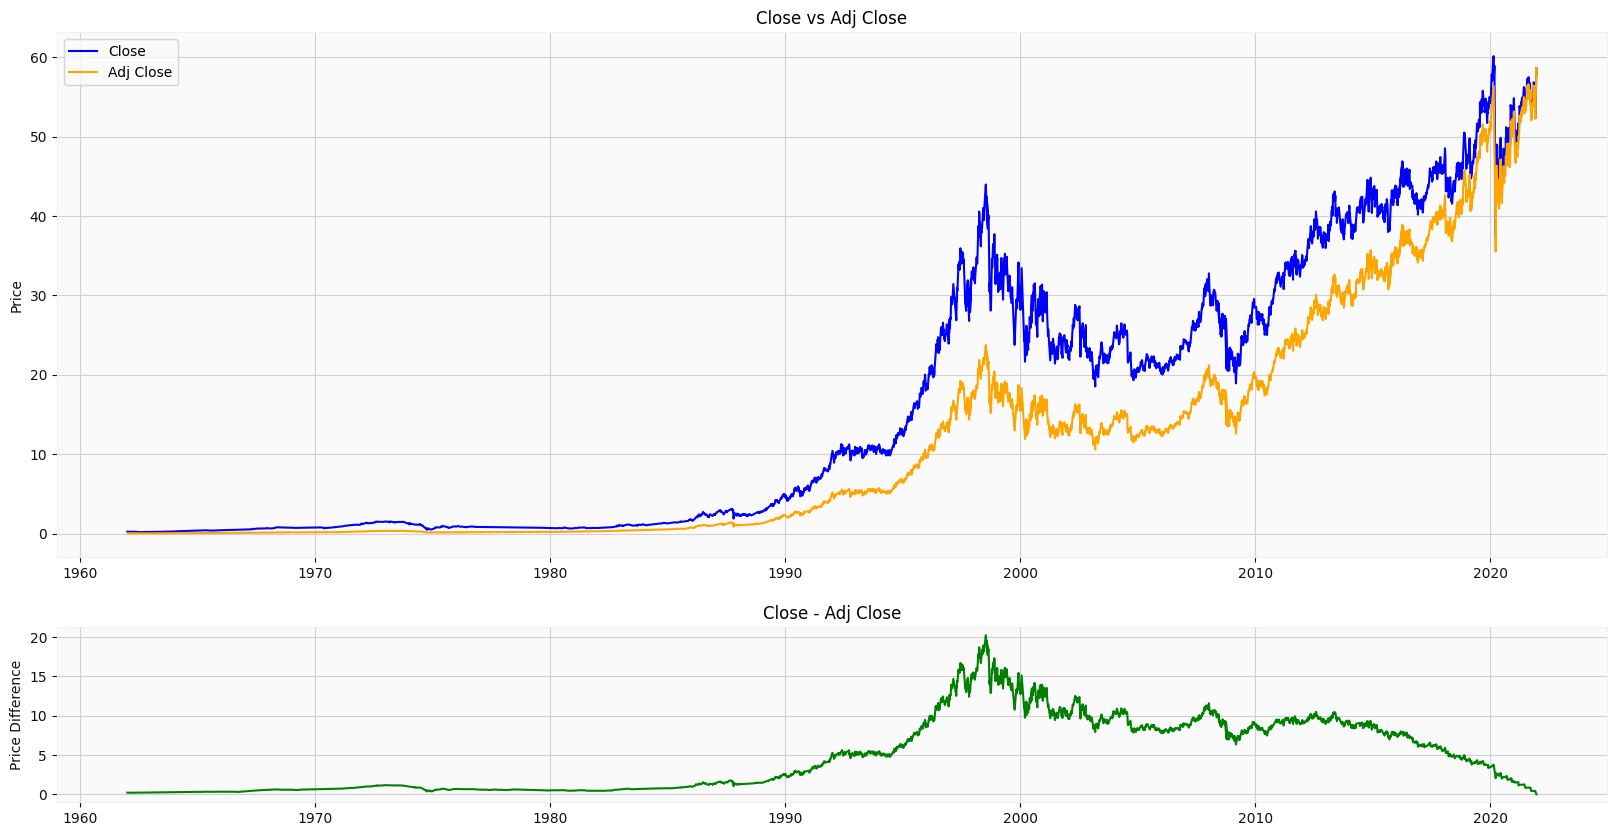

In [23]:
def plot_close_adj_close(df, start=None, end=None):
    if start is None:
        start = df['date'].min()
    if end is None:
        end = df['date'].max()
        
    df_ = df[(df['date'] >= start) & (df['date'] <= end)]

    fig, ax = plt.subplots(2, 1, figsize=(20, 10), height_ratios=[3, 1])
    ax[0].plot(df_['date'], df_['close'], label='Close', color='blue')
    ax[0].plot(df_['date'], df_['adj_close'], label='Adj Close', color='orange')
    ax[0].set_title('Close vs Adj Close')
    ax[0].set_ylabel('Price')
    ax[0].legend()

    ax[1].plot(df_['date'], df_['close'] - df_['adj_close'], label='Close - Adj Close', color='green')
    ax[1].set_title('Close - Adj Close')
    ax[1].set_ylabel('Price Difference')

    return fig, ax

plot_close_adj_close(df);

Nhìn vào biểu đồ, có thể thấy giai đoạn 1995 - 2005 có khá nhiều biến động. Chúng ta sẽ tiến hành xem xét giai đoạn này.

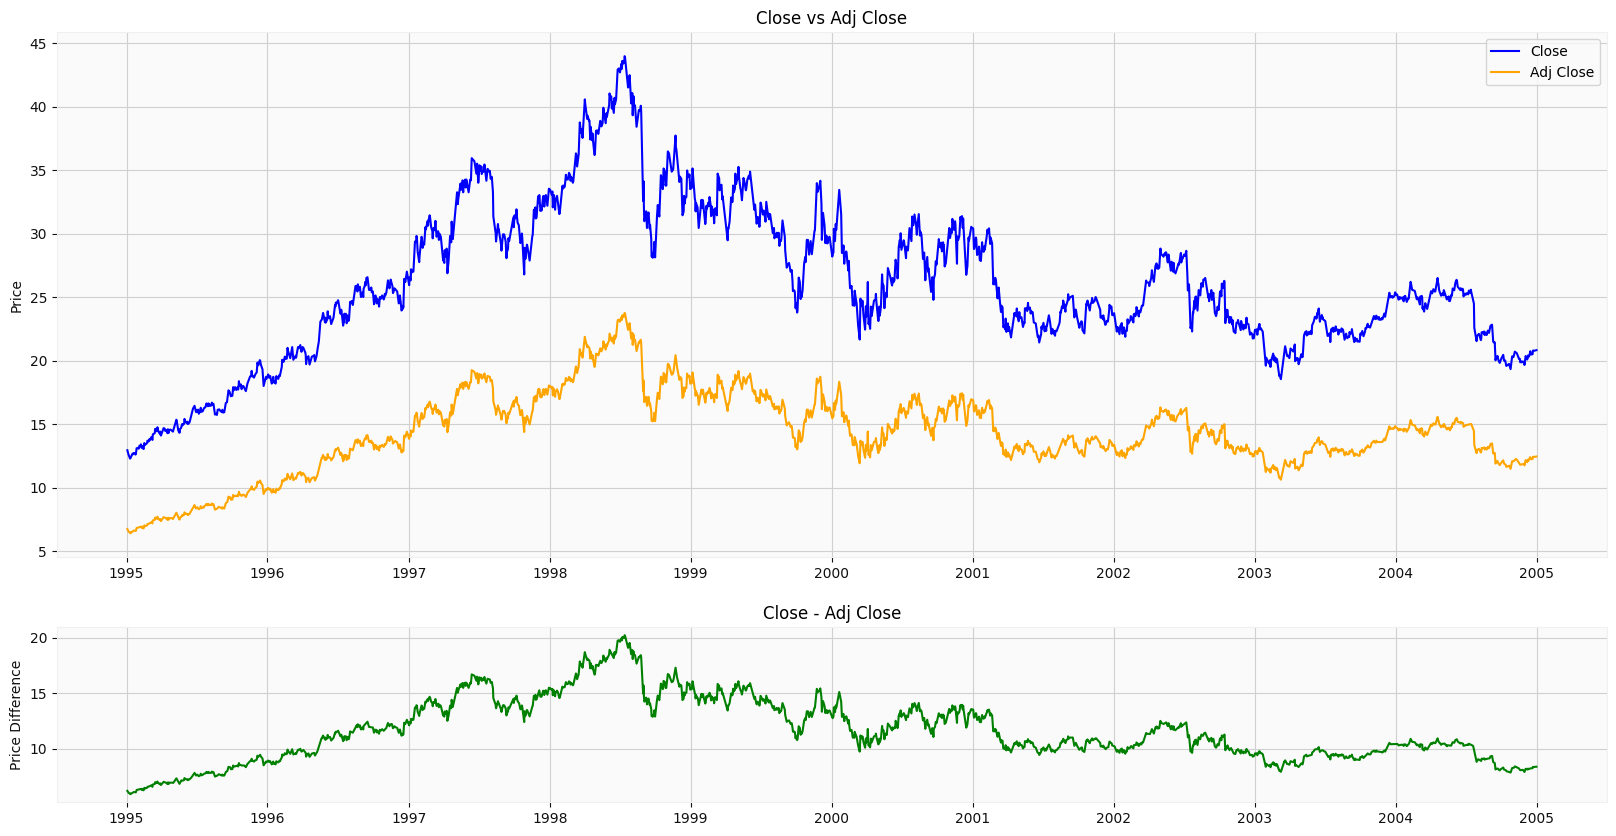

In [24]:
plot_close_adj_close(df, '1995-01-01', '2005-01-01');

**Quan sát Chung:**
- Giá Đóng Cửa (Close):
    - Từ năm 1995 đến 1999, giá đóng cửa tăng mạnh, đạt đỉnh vào khoảng năm 1998.
    - Sau đỉnh cao vào giữa 1998, giá đóng cửa giảm sâu sau đó phục hồi lại và tiếp tục giảm dần đến năm 2002.
- Giá Đóng Cửa Điều Chỉnh (Adj Close):
    - Xu hướng của giá đóng cửa điều chỉnh tương tự như giá đóng cửa, nhưng luôn thấp hơn do đã được điều chỉnh cho cổ tức, chia tách cổ phiếu và các sự kiện tài chính khác.
    - Sự chênh lệch giữa giá đóng cửa và giá đóng cửa điều chỉnh lớn nhất vào giai đoạn từ 1997 đến 2000.
- Sự Chênh Lệch giữa Close và Adj Close:
    - Sự chênh lệch này tăng dần từ năm 1995 và đạt đỉnh vào khoảng giữa 1998, sau đó giảm dần đến năm 2002.

**Nguyên Nhân của Sự Chênh Lệch:**
- Cổ tức:
    - Cổ tức được trả bằng tiền mặt thường làm giảm giá trị của cổ phiếu vào ngày giao dịch không hưởng quyền. Điều này làm cho giá đóng cửa điều chỉnh luôn cao hơn giá đóng cửa thực tế.
    - Từ năm 1995 đến 2002, Coca-Cola thường xuyên chi trả cổ tức, do đó sự chênh lệch giữa Close và Adj Close tăng lên.
- Chia tách cổ phiếu:
    - Chia tách cổ phiếu (stock splits) cũng là nguyên nhân chính dẫn đến sự chênh lệch giữa Close và Adj Close.
- Biến động Thị Trường:
    - Thị trường chứng khoán biến động mạnh vào cuối những năm 1990, đặc biệt là vào giai đoạn bong bóng dot-com. Sự biến động này cũng ảnh hưởng đến giá cổ phiếu của Coca-Cola, tạo ra sự chênh lệch lớn giữa giá đóng cửa và giá đóng cửa điều chỉnh.

**Kết Luận:**
- Sự chênh lệch giữa giá đóng cửa và giá đóng cửa điều chỉnh chủ yếu được gây ra bởi cổ tức và các sự kiện chia tách cổ phiếu.
- Biểu đồ từ năm 1995 đến 2002 cho thấy rằng sự chênh lệch này tăng mạnh nhất vào khoảng năm 1999, phản ánh sự biến động lớn của thị trường và các chính sách chi trả cổ tức của Coca-Cola.
- Sự biến động thị trường cuối những năm 1990, đặc biệt trong giai đoạn bong bóng dot-com, cũng là một yếu tố quan trọng làm tăng sự chênh lệch này.

### Câu hỏi 6: Có sự giao nhau giữa các trung bình động ngắn hạn (short-term MA) và trung bình động dài hạn (long-term MA) không? Và các điểm giao nhau này phân bố như thế nào trên biểu đồ chứng khoán?
**Mục đích**: Xác định các điểm giao cắt nơi trung bình động ngắn hạn cắt ngang trung bình động dài hạn. Những điểm này có thể chỉ ra tín hiệu mua hoặc bán cổ phiếu.

In [25]:
plt.figure(figsize=(20, 10))
# Copy dataframe
copied_df = df.copy()
# Tính trung bình động ngắn hạn (20 ngày)
copied_df['MA20'] = df['close'].rolling(20).mean()
# Tính trung bình động dài hạn (200 ngày)
copied_df['MA200'] = df['close'].rolling(200).mean()

# Tạo cột tín hiệu mua - bán
copied_df['signal'] = 0
# Xác định các điểm giao
copied_df['signal'][copied_df['MA20'] > copied_df['MA200']] = 1
copied_df['signal'][copied_df['MA20'] < copied_df['MA200']] = -1
# Xác định độ lớn của các điểm giao nhau
copied_df['crossover'] = copied_df['signal'].diff()
copied_df.set_index('date', inplace=True)
copied_df

/tmp/ipykernel_383/336530189.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copied_df['signal'][copied_df['MA20'] > copied_df['MA200']] = 1
/tmp/ipykernel_383/336530189.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copied_df['signal'][copied_df['MA20'] < copied_df['MA200']] = -1


,open,high,low,close,adj_close,volume,MA20,MA200,signal,crossover
date,,,,,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400,NaN,NaN,0,NaN
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400,NaN,NaN,0,0.0
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800,NaN,NaN,0,0.0
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800,NaN,NaN,0,0.0
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800,54.988,54.65040,1,0.0
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600,55.047,54.68890,1,0.0
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800,55.139,54.72930,1,0.0


<Figure size 2000x1000 with 0 Axes>

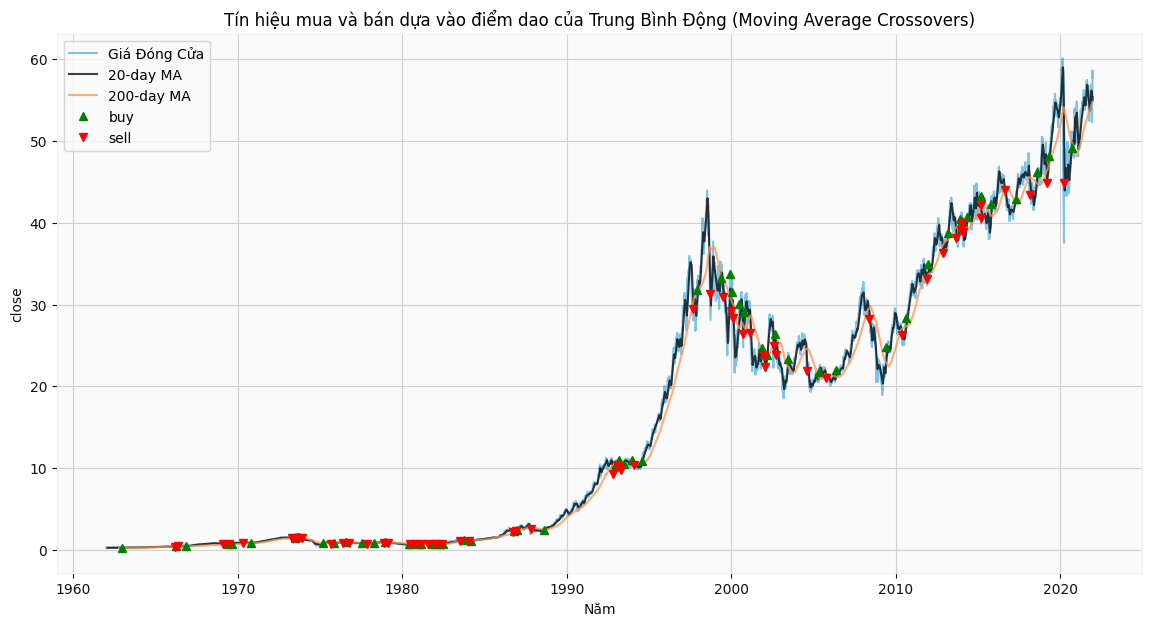

In [26]:
# Tín hiệu mua khi điểm giao = 2
buy_signals = copied_df[copied_df['crossover'] == 2]
# Tín hiệu bán khi điểm giao = -2
sell_signals = copied_df[copied_df['crossover'] == -2]
# Biểu thị trung bình động và giá đóng cửa 
plt.figure(figsize=(14,7))
sns.lineplot(copied_df['close'], label='Giá Đóng Cửa', alpha=0.5, color='#058ed9')
sns.lineplot(copied_df['MA20'], label='20-day MA', alpha=0.75, color='black')
sns.lineplot(copied_df['MA200'], label='200-day MA', alpha=0.75, color='#ff934f')

# biểu thị các tín hiệu mua và bán
plt.plot(buy_signals.index, 
         copied_df.loc[buy_signals.index]['close'], 
         '^', markersize = 6, color = 'g', label = 'buy')

plt.plot(sell_signals.index, 
         copied_df.loc[sell_signals.index]['close'], 
         'v', markersize = 6, color = 'r', label = 'sell')
plt.title('Tín hiệu mua và bán dựa vào điểm dao của Trung Bình Động (Moving Average Crossovers)')  
plt.xlabel('Năm')  # Đặt nhãn cho trục x
plt.legend()
plt.show()

Dựa vào biểu đồ, ta có thể nhận xét như sau:

- `Giá Đóng Cửa`: Biểu đồ cho thấy giá tiền cuối cùng được giao dịch.
- Khi `Trung Bình Động 20 ngày` cắt lên trên `Trung Bình Động 200 ngày`, đây là tín hiệu **mua**, thường đi trước sự **tăng giá**.
- Ngược lại, khi `Trung Bình Động 20 ngày` cắt xuống dưới `Trung Bình Động 200 ngày`, đây là tín hiệu **bán**, thường đi trước sự **giảm giá**.
- `Tín Hiệu Mua & Bán`: Các tín hiệu này được biểu diễn bằng các chấm trên biểu đồ và có thể giúp nhà đầu tư hoặc nhà giao dịch đưa ra quyết định mua vào hoặc bán ra dựa trên mô hình giá lịch sử.

Các tín hiệu mua - bán phân bố dày đặc với giá đóng cửa thấp chạm đáy từ những năm 1960 đến trước 1990 (phần lớn là điểm bán) chứng tỏ cổ phiếu lúc đó liên tục giảm và kéo dài, khiến các nhà đầu tư lần lượt bán bỏ bán tháo cổ phiếu để tránh bị lỗ. Từ 1990 về sau thì giá cổ phiếu bắt đầu có xu hướng ngày càng tăng mạnh, các tín hiệu mua - bán cũng dân phân bố trải rộng ra theo các năm, điều này chứng tỏ rằng các nhà đầu tư đã thấy được giá trị của cổ phiếu Coca-cola, do đó các nhà đầu tư sẽ biết canh chờ thời gian để mua hoặc bán cổ phiếu.

> Biểu đồ này không chỉ rõ đơn vị tiền tệ và thời gian, nhưng nó cung cấp cái nhìn tổng quan về cách sử dụng Trung Bình Động để phân tích và dự đoán xu hướng giá tài sản. Đây là công cụ phân tích kỹ thuật thường được sử dụng trong lĩnh vực tài chính và đầu tư.

**Encoding:**
- `close`:
    - Kiểu dữ liệu: Định lượng (quantiative) - thể hiện giá trị cổ phiếu
    - Encoding: Định hướng (orientation) - thể hiện xu hướng
- `MA20 và MA200`:
    - Kiểu dữ liệu: Định lượng (quantiative) - thể hiện giá trị trung bình động của cổ phiếu 20 ngày và 200 ngày
    - Encoding: Định hướng (orientation) - thể hiện xu hướng
- `Tín hiệu mua và bán`:
    - Kiểu dữ liệu: Định tính (qualitative) - phân loại tín hiệu
    - Encoding: Hình dạng (shape) - dễ dàng phân biệt nào là kí hiệu của tín hiệu mua hoặc Bán

**Kỹ thuật được sử dụng trong biểu đồ:**
- *Nguyên tắc tương đồng (Similarity)*: Các tín hiệu mua bán được phân biệt rõ ràng bằng màu sắc và hình dạng, dễ dàng hiểu và phân biệt tín hiệu. 
- *Sử dụng màu sắc*: Màu sắc được sử dụng để phân biệt các đường đi cổ phiếu ở các MA và giá trị cố phiếu, các tín hiệu mua và bán giúp người xem dễ dàng nhận biết và so sánh.

### Câu hỏi 7: Phân tích mức độ ảnh hưởng của các sự kiện trong lịch sử đến giá và khối lượng cổ phiếu. Từ đó sử dụng mô hình ARIMA (AutoRegressive Integrated Moving Average) để dự đoán giá cổ phiếu
- Các bước để giải quyết bài toán:
    - Xác định các mốc thời gian cụ thể.
    - Phân đoạn dữ liệu: phân đoạn dữ liệu trước, trong và sau mốc thời gian để so sánh các chỉ số.
    - Tính toán các chỉ số cần phân tích.
    - Trực quan hóa.
- Mục đích: đây được xem như là dạng phân tích sự kiện nên từ các điểm sự kiện, chúng ta có thể tìm hiểu cách các sự kiện đó ảnh hưởng đến các yếu tố trong kinh tế, xã hội,...Trong ví dụ này, có thể giúp các nhà đầu tư có cái nhìn sâu hơn về sự ảnh hưởng lên giá và khối lượng cổ phiếu, từ đó giúp họ đưa ra quyết định đầu tư thông minh hơn...

Ví dụ

In [27]:
from datetime import datetime

# Hàm phân tích sự kiện, đầu vào df: dữ liệu cần quan sát
# event_date(str): ngày diễn ra sự kiện theo format yyyy-mm-dd
# day: số ngày mà muốn quan sát trước và sau kể từ event_date
def event_analyze(df, event_date, day):
    df_copy = df.copy()
    date_object = datetime.strptime(event_date, "%Y-%m-%d")

    before_date = date_object - pd.Timedelta(days=day)
    after_date = date_object + pd.Timedelta(days=day)

    # Lấy phân đoạn
    segment_df = df_copy[(df_copy['date'] >= before_date) & (df_copy['date'] <= after_date)]
    
    # Chuẩn hóa dữ liệu giao dịch để gradient màu
    norm = plt.Normalize(segment_df['volume'].min(), segment_df['volume'].max())
    volume_color = plt.cm.Greens(norm(segment_df['volume']))

    # Trục quan hóa
    fig, ax1 = plt.subplots(figsize=(14, 7))

    bars = ax1.bar(segment_df['date'], segment_df['volume'], label='Khối Lượng Giao Dịch', color=volume_color, alpha=0.5)
    ax1.axvline(date_object, color='r', linestyle='--', label='Ngày Sự Kiện')
    ax1.set_xlabel('Ngày')
    ax1.set_ylabel('Khối Lượng Giao Dịch', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx()
    ax2.plot(segment_df['date'], segment_df['close'], label='Giá Đóng Cửa', color='blue')
    ax2.set_ylabel('Giá Đóng Cửa', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.set_title('Giá Cổ Phiếu và Khối Lượng Giao Dịch Trước và Sau Sự Kiện')
 
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

    plt.show()

Theo như ta đã biết, để xây dựng và củng cố thương hiệu trong tâm trí người tiêu dùng cũng như thúc đẩy hành vi mua sắm của người tiêu dùng, từ đó tăng doanh số bán hàng và doanh thu, nâng cao trải nghiệm khách hàng thì các doanh nghiệp sẽ đưa ra nhiều chiến dịch marketing để đạt được các điều đó. Tuy nhiên, không phải chiến dịch nào cũng sẽ thành công tuyệt đối, hãy xem xét sự kiện sau:
- Sự kiện này ra đời sau khi đối thủ của Coca-Cola là Pepsi đã triển khai chiến dịch marketing huyền thoại vào năm 1975 kéo dài đến những năm 80 có tên là `Thử thách Pepsi`. Lúc đó mọi người sẽ được yêu cầu bịt mắt và thử 2 cốc chứa Coke và Pepsi, tỷ lệ lớn người trải nghiệm nói rằng họ thích Pepsi ngay từ ngụm đầu tiên, ngay chính khi Coca-Cola thực hiện thử thách này, họ cũng bị shock khi nhận thấy kết quả tương tự. Và họ cảm thấy `không phục`.
- Và thế là cụ thể vào ngày `23-4-1985`, phía Coca-Cola cho ra đời New Coke. Họ đã cho thử nghiệm ở thị trường Mỹ và Canada, may mắn thay hầu hết đều thích hương vị của New Coke hơn Pepsi, tất nhiên là hơn cả Classic Coke.
- Tuy nhiên, giám đốc Coca-Cola lại có nước đi vào lòng đất là thay vì bán song song New Coke và Classic Coke, ông lại quyết định ngừng chuỗi cung ứng Classic Coke. Cuối cùng, người tiêu dùng nổi trận lôi đình, phía Coca-Cola nhận hàng nghìn cuộc gọi và thư từ giận dữ, khoảng 8000 cuộc điện thoại mỗi ngày. Tồi tệ hơn là cổ phiếu của Coca-Cola giảm xuống còn Pepsi thì lại tăng.
- Để khắc phục, họ đã rút New Coke ra khỏi thị trường và thay thế tất cả bằng Classic Coke vào ngày `11-7-1985` và đã nhanh chóng quay trở lại vị thế kinh doanh đồ uống có gas. Nếu Coke đặt ra những câu hỏi đúng ngay từ đầu thì họ đã không phải chi hàng triệu USD phải chịu một thảm họa marketing lớn như thế này!
- Tham khảo: https://www.history.com/this-day-in-history/new-coke-debuts-one-of-the-biggest-product-flops-in-history
- Ta có thể quan sát biểu đồ thể hiện giá cổ phiếu và khối lượng giao dịch trước và sau sự kiện release New Coke ở phía dưới:

Ta sẽ quan sát sự giao động của giá cổ phiếu và khối lượng giao dịch kể từ ngày bắt đầu sự kiện trước và sau là 150 ngày ~ 5 tháng.

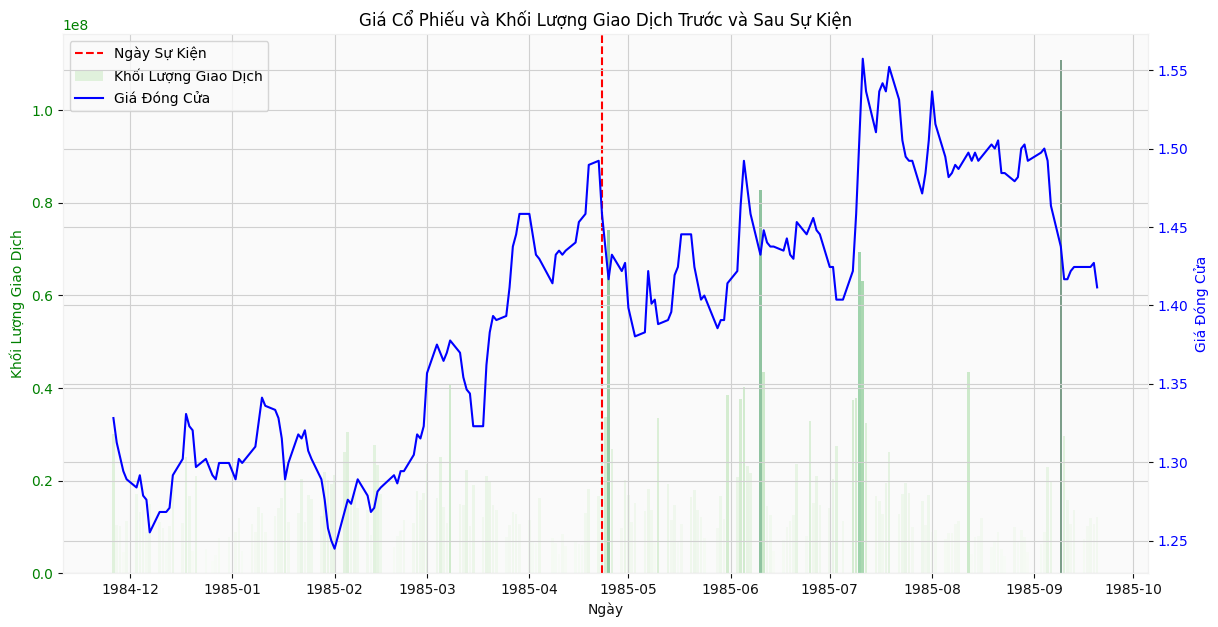

In [28]:
event_analyze(df,'1985-04-23',150)

**Giải thích biểu đồ:**
- Trong biểu đồ này, có hai loại dữ liệu khác nhau được hiển thị: khối lượng giao dịch và giá cổ phiếu. Mỗi loại dữ liệu được biểu diễn bằng một loại biểu đồ và màu sắc khác nhau vì các lý do sau:
    - `Khối lượng giao dịch dùng biểu đồ cột (bar chart)`:
        - `Lý do dùng bar chart`: Khối lượng giao dịch là một giá trị số thể hiện số lượng cổ phiếu được giao dịch trong một ngày nhất định. Biểu đồ cột là một lựa chọn tốt để thể hiện dữ liệu dạng này vì nó dễ dàng hiển thị các giá trị rời rạc trong khoảng thời gian nhất định, cho thấy sự thay đổi về khối lượng giao dịch qua các ngày.
        - `Màu xanh lá (gradient)`: Màu xanh lá được chọn cho khối lượng giao dịch để làm nổi bật sự khác biệt giữa các cột và để không làm lu mờ biểu đồ đường của giá cổ phiếu. Đặc biệt khi dùng kỹ thuật gradient màu cho làm nổi bật được thời điểm có khối lượng giao dịch cao, màu càng nhạt thì khối lượng giao dịch càng ít.
    - `Giá cổ phiếu dùng biểu đồ đường (line chart)`:
        - `Lý do dùng line chart`: Giá cổ phiếu là một dãy liên tục của các giá trị theo thời gian. Biểu đồ đường là cách tốt nhất để thể hiện sự thay đổi liên tục này, giúp người xem dễ dàng nhận ra xu hướng và biến động của giá cổ phiếu theo thời gian.
        - `Màu xanh đậm`: Màu xanh đậm được chọn cho giá cổ phiếu để nó nổi bật trên biểu đồ, giúp người xem dễ dàng theo dõi xu hướng giá cổ phiếu hơn.
    - Màu sắc và ký hiệu đặc biệt:
        - `Đường dọc màu đỏ`: Đường dọc màu đỏ (Ngày Sự Kiện) được dùng để đánh dấu một sự kiện quan trọng có thể ảnh hưởng đến cả khối lượng giao dịch và giá cổ phiếu. Màu đỏ thường được sử dụng để chỉ ra các điểm đặc biệt hoặc quan trọng vì nó thu hút sự chú ý.
        - Ngoài ra biểu đồ được thiết kế màu sắc cho người mù màu đỏ, giúp những người này có thể phân biệt được màu giữa các đối tượng trong biểu đồ.


- **Phân tích biểu đồ**:
  - Trước ngày diễn ra sự kiện, giá đóng cửa đạt đỉnh mức gần `1.50` USD. Trong khoảng diễn ra sự kiện từ cuối 5/1985 đến đầu 7/1985, giá đóng cửa tăng giảm liên tục, giảm xuống còn `1.40` USD, cho thấy có sự bất ổn sau khi sự kiện New Coke diễn ra. Sau khi Coca-Cola đưa ra biện pháp khắc phục vào tháng 7, giá cổ phiếu có dấu hiệu tăng trở lại đạt đỉnh `1.57` USD vào giữa tháng 7.
  - Về khối lượng giao dịch cổ phiếu, vài ngày sau sự kiện, khối lượng giao dịch tăng mạnh có thể đã xảy ra hiện tượng `Bán tháo`, nguyên nhân là do có rất nhiều người đang bán đi cổ phiếu dẫn đến lượng giao dịch tăng đột biến. Đây là dấu hiện của sự lo ngại về tương lại của cổ phiếu Coca-Cola, làm nhiều người muốn bán ra để giảm thiểu rủi ro.
  - Trái ngược với các ngày gần ngày diễn ra sự kiện, ngày mà Coca-Cola khắc phục chiến dịch, có thể thấy khối lượng giao dịch lúc này cũng tăng nhưng không phải do tình trạng `Bán tháo`, đây là hiện tượng `Mua vào`. Thường xảy ra khi có tin tức, sự kiện tích cực hay công bố kinh doanh tốt, lúc này các tay chơi cổ phiếu sẽ tất tay đầu tư cho doanh nghiệp đó.
  - Ngoài hiện tượng `Bán tháo` và `Mua vào`, có thể có một vài lí do khác như `Thao túng thị trường`,... Nhưng ở hai mốc đề cập ở trên, `Bán tháo` và `Mua vào` có vẻ hợp lí.

Ở ví dụ tiếp theo này, ta sẽ phân tích sự tác động của đại dịch Covid-19 (bùng phát trong giữa tháng 2 và tháng 3) đến giá và khối lượng giao dịch cổ phiếu với mỗi khoảng trước và sau sự kiện là 150 ngày.

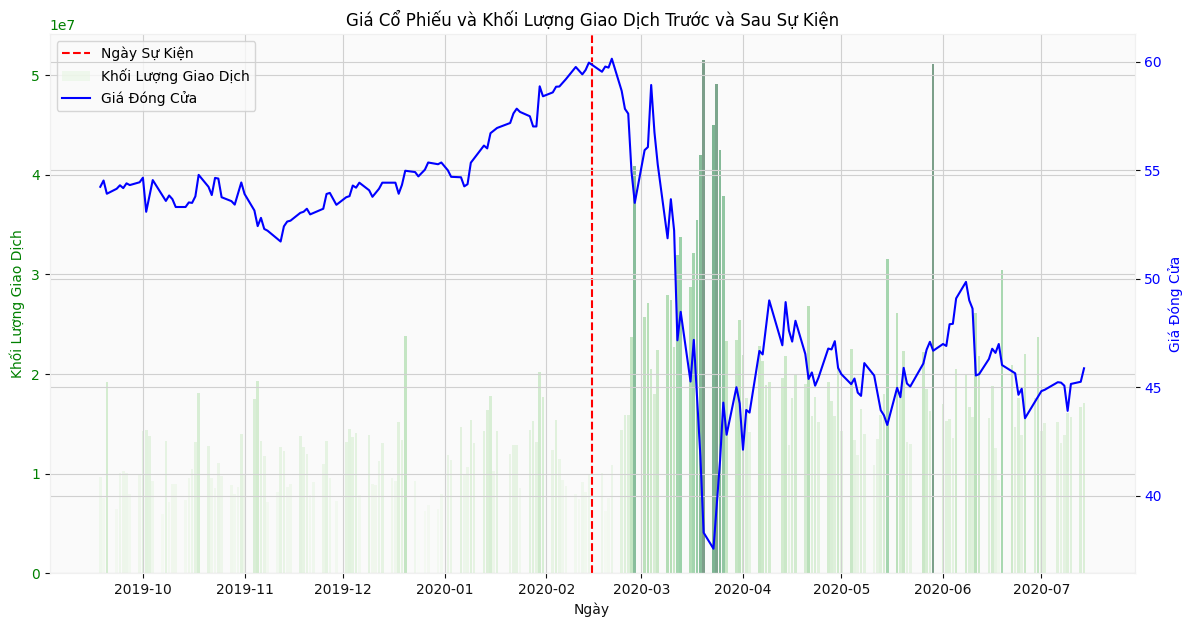

In [29]:
event_analyze(df,'2020-02-15',150)

Biểu đồ này các chú thích, biểu diễn tương tự như nhóm đã đề cập ở trên.

**Phân tích biểu đồ**:
- Trước ngày bùng dịch bệnh, ta có thể thấy giá cổ phiếu tăng đều và sự giao dịch cổ phiếu diễn ra khá ổn định của Coca-Cola.
- Sau đó, giá cổ phiếu `rớt mạnh` vào gần cuối tháng 4-2020 tại `36` USD (đã đối chiếu trong dataset). So với trước dịch, giá cổ phiếu đã giảm gần `một nửa` giá trị từ `60` USD xuống còn hơn `36` USD.
- Cùng với đó, khối lượng giao dịch cũng biến động mạnh với hiện tượng `Bán tháo` diễn ra trong suốt từ đầu tháng 3 đến giữa tháng 4.

**Kết luận**:

Từ hai sự kiện tiêu biểu nhóm đã lựa chọn, ta có thể thấy các sự kiện có tác động mạnh hay yếu tùy thuộc vào quy mô mà nó ảnh hưởng. Các nhà đầu tư có thể dựa vào các sự kiện để đưa ra quyết định đầu tư thông minh như 
- Công bố kết quả kinh doanh của doanh nghiệp.
- Tin tức về kinh tế vĩ mô.
- Sự biến động thị trường toàn cầu.
- Phát hành sản phẩm mới.
- Tin đồn và thông tin nội bộ.

Ngoài ra, nên xem xét các khía cạnh khác để có thể nhận ít rủi ro hơn trong đầu tư (thông qua ví dụ New Coke, xem xét nước đi của ông giám đốc chẳng hạn,...).

#### Ứng dụng mô hình thống kê ARIMA vào bài toán dự đoán giá cổ phiếu (giá đóng cửa) của Coca-Cola
Bài toán gồm các bước:
- Chuẩn bị dữ liệu.
- Xây dựng và đánh giá mô hình ARIMA bằng thư viện `statsmodels`.
- Đánh giá mô hình.

##### Chuẩn bị dữ liệu
Nhóm sẽ dùng cột `close` và `date` cho bài toán này. Vì bài toán là dự đoán giá cổ phiếu, mà cổ phiếu ít nhiều phản ảnh nền kinh tế, từ sức khỏe kinh tế tổng thể đến sự thăng trầm của doanh nghiệp cụ thể, đây là Coca-Cola. Ta không thể lấy giá cổ phiếu từ hàng chục năm trước để dự đoán cho hiện tại. Cho nên nhóm sẽ chọn thời gian cách ngày cuối của bộ dữ liệu là tầm khoảng 1 năm lúc mà đại dịch Covid-19 đã dần dần dịu đi.

In [30]:
import warnings
warnings.filterwarnings('ignore')

df_prep = df[['date', 'close']]
df_prep['date'] = pd.to_datetime(df_prep['date'])
start_date = pd.to_datetime('2020-10-20').strftime('%Y-%m-%d')  # bắt đầu từ ngày 20-10-2020
df_prep = df_prep[df_prep['date'] >= start_date]
df_prep.reset_index(inplace=True)
df_prep=df_prep.drop(columns=['index'])
df_prep.head()

,date,close
0,2020-10-20,50.250000
1,2020-10-21,49.990002
2,2020-10-22,50.680000
3,2020-10-23,50.520000
4,2020-10-26,49.799999


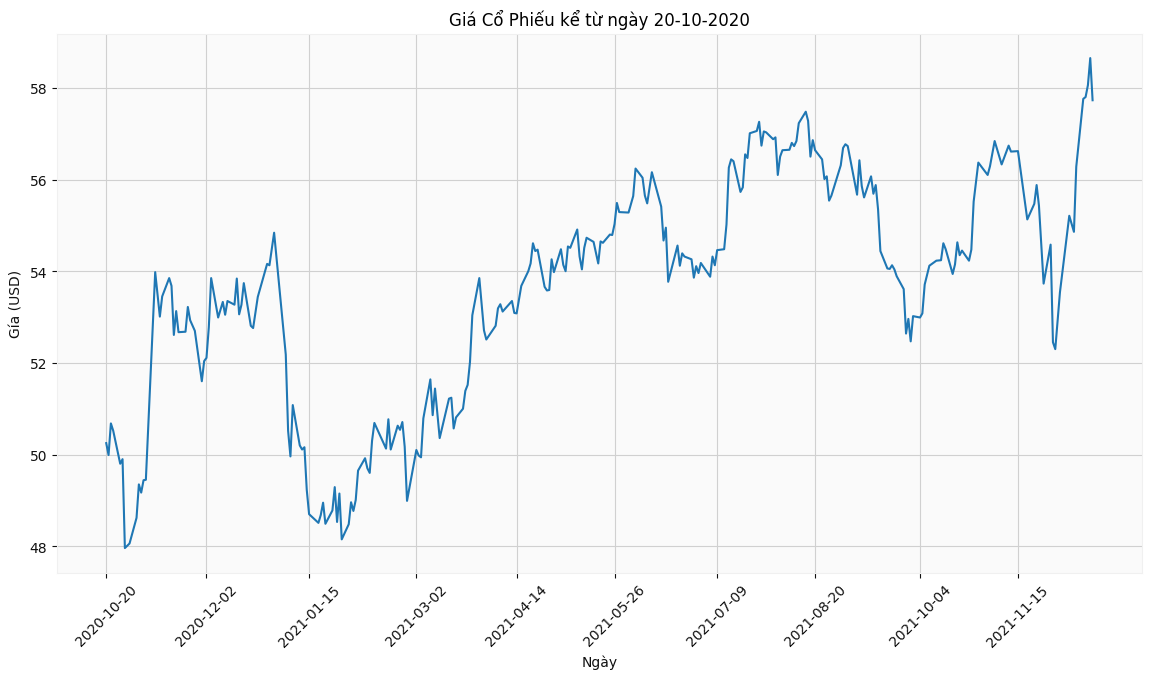

In [31]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_prep['date'], df_prep['close'])

selected_dates = df_prep['date'][::30]
ax.set_xticks(selected_dates)
ax.set_xticklabels(selected_dates.dt.strftime('%Y-%m-%d'))
ax.set_title('Giá Cổ Phiếu kể từ ngày 20-10-2020')
ax.set_xlabel('Ngày')
ax.set_ylabel('Gía (USD)')
plt.xticks(rotation=45)
plt.show()

##### Xây dựng mô hình ARIMA từ thư viện `statsmodel`
Mô hình ARIMA có các siêu tham số như:
- p - Autoregressive (AR) Order: đại diện cho số lượng các giá trị trễ của chính chuỗi thời gian được sử dụng để dự đoán giá trị hiện tại
- d - Integrated (I) Order: đại diện cho số lần differencing cần thiết để làm cho chuỗi thời gian trở nên tĩnh (stationary) nghĩa là các thuộc tính thống kê của nó như trung bình, phương sai, tự hiệp phương sai không thay đổi theo thời gian.
- q - Moving Average (MA) Order: đại diện cho số lượng giá trị trễ của nhiễu trắng (white noise) được sử dụng để dự đoán giá trị hiện tại.

In [32]:
from pmdarima import auto_arima

# Đầu tiên, chia dữ liệu thành tập train và tập test theo tỷ lệ 80/20
# Bởi vì đây là dữ liệu time-series, liên tục nên ta sẽ lấy trên khoảng liên tục, không chia tập như mô hình học máy.
split_point = int(len(df_prep['close'])*0.8)
train_data, test_data = df_prep['close'][:split_point],df_prep['close'][split_point:]

# Vì mô hình ARIMA có 3 siêu tham số cần tìm (khá cực) nên dùng auto_arima từ thư viện pmdarima
# để tìm mô hình tối ưu cho mô hình ARIMA :>
auto_found_model = auto_arima(df_prep['close'], start_p=0, start_q=0,
                            max_p=5, max_q=5, seasonal=False,
                            trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto_found_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=506.188, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=508.187, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=508.187, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=504.775, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=510.188, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.148 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  294
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -251.388
Date:                Sat, 08 Jun 2024   AIC                            504.775
Time:                        14:54:45   BIC                            508.456
Sample:                             0   HQIC                           506.249
                                - 294                                         
Co

Sau khi dùng `auto_arima` để tìm bộ siêu tham số tối ưu cho mô hình ARIMA, nhóm được bộ siêu tham số là `(p=0,d=1,q=0)`. Áp dụng bộ siêu tham số này cho mô hình:

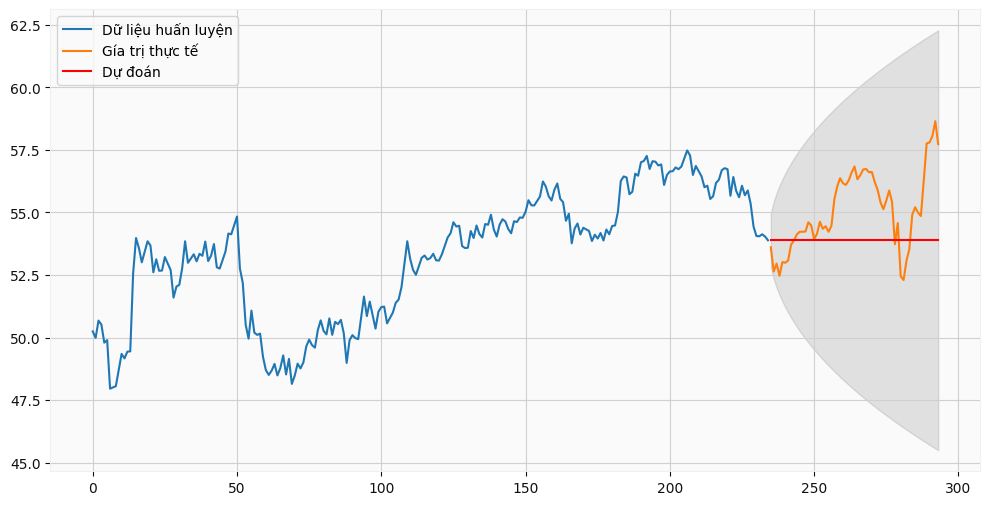

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Tạo và huấn luyện mô hình ARIMA
model = ARIMA(train_data, order=(0, 1, 0))
fitted_model = model.fit()

# Dự báo trong tập dữ liệu
start_index = split_point
end_index = len(df_prep) -1
forecast_results = fitted_model.get_prediction(start=start_index, end=end_index, dynamic=False)

# Lấy giá trị dự báo, sai số chuẩn và khoảng tin cậy
fc = forecast_results.predicted_mean
se = forecast_results.se_mean
conf = forecast_results.conf_int(alpha=0.05)

# Trực quan hóa
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Dữ liệu huấn luyện')
plt.plot(test_data, label='Gía trị thực tế')
plt.plot(fc, label='Dự đoán', color='red')
plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='k', alpha=0.1)
plt.legend(loc='upper left')
plt.show()

**Giải thích biểu đồ**
Biểu đồ trên có ba loại dữ liệu được hiển thị: dữ liệu huấn luyện, giá trị thực tế và dự đoán. Cả ba loại dữ liệu đều được biểu diễn bằng một kiểu biểu đồ và màu sắc khác nhau để làm rõ ý nghĩa của từng loại dữ liệu:
- `Dùng biểu đồ đường (line chart)`: Dữ liệu trên là một dãy liên tục của các giá trị theo thời gian. Biểu đồ đường là cách tốt nhất để thể hiện sự thay đổi liên tục này, giúp người xem dễ dàng nhận ra xu hướng và biến động của dữ liệu.
- `Sự khác biệt về màu`:
    - `Màu xanh dương`: Màu xanh dương được chọn cho dữ liệu huấn luyện để phân biệt nó rõ ràng với các giá trị khác trong biểu đồ.
    - `Màu cam`: Màu cam được chọn cho giá trị thực tế để nó nổi bật và dễ dàng phân biệt với dữ liệu huấn luyện và dự đoán.
    - `Màu đỏ`: Màu đỏ được chọn cho đường dự đoán để nó nổi bật, để cho thấy rõ sự khác biệt giữa các giá trị dự đoán.
    - `Vùng xám`: Vùng xám biểu thị khoảng tin cậy hoặc độ không chắc chắn của các dự đoán. Vùng này giúp người xem hiểu được mức độ tin cậy của các dự đoán, cho thấy khả năng biến động của dữ liệu dự đoán trong tương lai.

    

**Nhận xét biểu đồ**:
- `Dữ liệu huấn luyện (màu xanh lam)`: Đây là phần dữ liệu đã được sử dụng để huấn luyện mô hình ARIMA. Dữ liệu này kéo dài từ điểm 0 đến gần 200 và cho thấy xu hướng tăng dần cho đến điểm khoảng 150, sau đó ổn định.
- `Dự đoán (màu đỏ)`: Dự đoán của mô hình, hiển thị từ điểm khoảng 200 trở đi. Phần dự đoán này nhìn phẳng hơn so với thực tế và không thể hiện các biến động mạnh như giá trị thực tế. Cho thấy mô hình có thể không bắt kịp hoặc phản ứng nhanh với các thay đổi đột ngột hoặc lớn trong dữ liệu.
- `Giá trị thực tế (màu cam)`: Đường này cho thấy các giá trị thực tế. Có sự chênh lệch rõ ràng giữa dự đoán và thực tế, đặc biệt là trong những thời điểm có sự thay đổi đột ngột. Giá trị thực tế có xu hướng biến động mạnh hơn so với dự đoán của mô hình.
- `Khoảng tin cậy 95% (màu xám)`: Khoảng này cho biết rằng, với mức độ tin cậy 95%, các giá trị dự đoán thực tế nằm trong khoảng này. Nghĩa là, có 95% khả năng các giá trị thực tế sẽ nằm trong phạm vi màu xám này. Khoảng tin cậy rộng hơn ở cuối dãy dự đoán phản ánh mức độ không chắc chắn cao hơn khi dự đoán càng xa về tương lai.

##### Đánh giá mô hình

In [34]:
mape = np.mean(np.abs(fc - df_prep['close']) / np.abs(df_prep['close'])) * 100
me = np.mean(fc - df_prep['close'])
mae = np.mean(np.abs(fc - df_prep['close']))
mpe = np.mean((fc - df_prep['close']) / df_prep['close']) * 100
rmse = np.sqrt(np.mean((fc - df_prep['close'])**2))

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Mean Error (ME): {:.2f}".format(me))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Percentage Error (MPE): {:.2f}%".format(mpe))
print("Root Mean Square Error (RMSE): {:.2f}".format(rmse))

Mean Absolute Percentage Error (MAPE): 2.78%
Mean Error (ME): -1.18
Mean Absolute Error (MAE): 1.56
Mean Percentage Error (MPE): -2.07%
Root Mean Square Error (RMSE): 1.94


**Nhận xét**:
- `MAPE ở mức 2.78%` là khá thấp, cho thấy mô hình ARIMA có khả năng dự đoán khá chính xác và sai số không đáng kể so với giá trị thực.
- `Mean Error (ME) -1.18`: ME cho biết sự lệch trung bình của các dự đoán so với giá trị thực. Một ME âm cho thấy rằng mô hình có xu hướng dự đoán thấp hơn giá trị thực tế.
- `Mean Absolute Error (MAE) - 1.56`: MAE đo lường trung bình của giá trị tuyệt đối của các sai số, nó cho biết mức độ lớn của sai số dự đoán mà không xem xét hướng của sai số đó. Giá trị MAE 1.56 là tương đối thấp, điều này nói lên rằng mô hình có độ chính xác cao.
- `Mean Percentage Error (MPE) -2.07%`: MPE là chỉ số đo lường tỷ lệ phần trăm lệch trung bình, giá trị âm cho thấy mô hình thường dự đoán thấp hơn giá trị thực tế. Giống như ME, chỉ số này cũng chỉ ra xu hướng chung của mô hình trong dự đoán.
- `Root Mean Square Error (RMSE) - 1.94`: RMSE là căn bậc hai của trung bình các bình phương sai số. Nó cho phép đánh giá sai số trong cùng một đơn vị với dữ liệu gốc. RMSE 1.94, tương đối thấp, là một dấu hiệu tốt cho thấy mô hình dự đoán có độ chính xác cao và sai số không đáng kể.
- Mặc dù mô hình ARIMA trên có thể cung cấp dự đoán có độ chính xác hợp lý với chỉ số MAPE và RMSE tốt, nhưng việc dự đoán các biến động đột ngột và lớn vẫn còn là thách thức. Điều này đặc biệt quan trọng khi cần dự đoán trong những điều kiện thị trường hoặc dữ liệu biến động cao. Do đó, cần xem xét phải kết hợp thêm các phương pháp phân tích khác để cải thiện khả năng dự báo chính xác hơn.